In [8]:
# This file is for quick plotting of histograms of particle properties, to debug potential issues with cuts etc.
import torch
import sys
import os.path as osp
import os
import sys
import numpy as np
from src.dataset.dataset import SimpleIterDataset, EventDataset
from src.utils.utils import to_filelist
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
matplotlib.rc('font', size=13)
from src.plotting.plot_event import plot_event_comparison
from src.dataset.functions_data import concat_events
from src.utils.paths import get_path
from dotenv import load_dotenv
load_dotenv()


True

In [9]:
def remove_from_list(lst):
    out = []
    for item in lst:
        if item in ["hgcal", "data.txt", "test_file.root"]:
            continue
        out.append(item)
    return out

#path = "/eos/user/g/gkrzmanc/jetclustering/data/SVJ_std_UL2018_scouting_test_large/SVJ_mMed-700GeV_mDark-20GeV_rinv-0.7_alpha-peak"
def get_iter(path_to_ds):
    return iter(EventDataset.from_directory(path_to_ds, aug_soft=1))



In [10]:
dataset = get_iter(get_path("/work/gkrzmanc/jetclustering/preprocessed_data/Feb26_2025_E1000_N500_noPartonFilter_C_F/PFNano_s-channel_mMed-1200_mDark-20_rinv-0.3_alpha-peak_13TeV-pythia8_n-1000", "preprocessed_data"))

In [12]:
e = next(dataset)

In [14]:
e.pfcands.pt

tensor([1.0700e+02, 4.8500e+01, 3.3562e+01, 2.3875e+01, 1.8922e+01, 1.8766e+01,
        1.6797e+01, 1.6500e+01, 1.6406e+01, 1.5891e+01, 1.3500e+01, 1.3406e+01,
        1.1125e+01, 1.1117e+01, 1.1102e+01, 9.8750e+00, 9.7266e+00, 9.4219e+00,
        8.6875e+00, 8.3203e+00, 7.5938e+00, 7.4844e+00, 7.4453e+00, 7.2773e+00,
        6.1211e+00, 5.0430e+00, 4.9062e+00, 4.5938e+00, 4.5391e+00, 4.3047e+00,
        3.9805e+00, 3.8125e+00, 3.7480e+00, 3.6621e+00, 3.6250e+00, 3.2383e+00,
        3.2266e+00, 3.1133e+00, 2.9336e+00, 2.9160e+00, 2.8828e+00, 2.7891e+00,
        2.7793e+00, 2.7305e+00, 2.6016e+00, 2.5352e+00, 2.5098e+00, 2.4316e+00,
        2.3555e+00, 2.3281e+00, 2.2852e+00, 2.2480e+00, 2.2461e+00, 2.1680e+00,
        2.1250e+00, 2.0801e+00, 2.0234e+00, 2.0195e+00, 2.0195e+00, 2.0020e+00,
        1.9668e+00, 1.9453e+00, 1.9082e+00, 1.8906e+00, 1.8867e+00, 1.8799e+00,
        1.8760e+00, 1.8613e+00, 1.8350e+00, 1.8271e+00, 1.8115e+00, 1.8096e+00,
        1.8037e+00, 1.7969e+00, 1.7891e+

In [4]:

parton_eta, parton_pt = [], []
gen_eta, gen_pt = [], []
pfcand_eta, pfcand_phi = [], []
pfcand_pt = []
parton_phi = []
gen_phi = []
from tqdm import tqdm
for event in tqdm(dataset):
    parton_eta += event.final_parton_level_particles.eta.tolist()
    parton_pt += event.final_parton_level_particles.pt.tolist()
    gen_eta += event.final_gen_particles.eta.tolist()
    gen_pt += event.final_gen_particles.pt.tolist()
    pfcand_eta += event.pfcands.eta.tolist()
    pfcand_phi += event.pfcands.phi.tolist()
    pfcand_pt += event.pfcands.pt.tolist()
    parton_phi += event.final_parton_level_particles.phi.tolist()
    gen_phi += event.final_gen_particles.phi.tolist()
    pfcand_phi += event.pfcands.phi.tolist()


717it [00:04, 164.43it/s]


KeyboardInterrupt: 

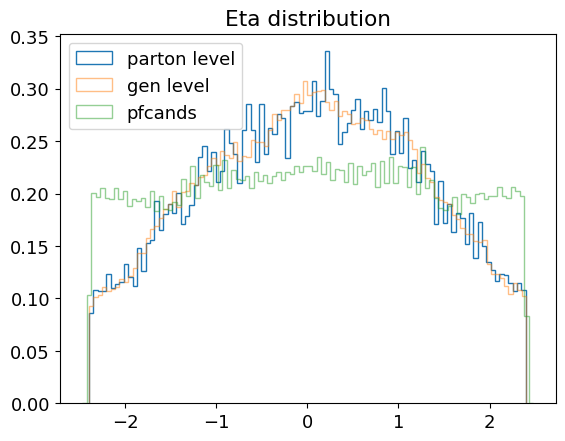

In [5]:
fig, ax = plt.subplots()
ax.hist(parton_eta, bins=100, label="parton level", histtype="step", density=True)
ax.hist(gen_eta, bins=100, alpha=0.5, label="gen level", histtype="step",  density=True)
ax.hist(pfcand_eta, bins=100, alpha=0.5, label="pfcands", histtype="step", density=True)
ax.set_title("Eta distribution")
ax.legend()
fig.show()


/tmp/ipykernel_59226/1458644762.py:11: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  ax.set_xlim([0, 200])


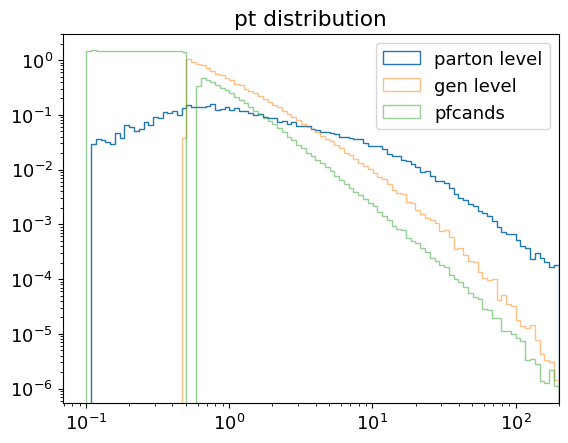

In [6]:
fig, ax = plt.subplots()
bins = np.linspace(0, 200, 100)
logbins = np.geomspace(0.1, 200, 100)
ax.hist(parton_pt, bins=logbins, label="parton level", histtype="step", density=True)
ax.hist(gen_pt, bins=logbins, alpha=0.5, label="gen level", histtype="step",  density=True)
ax.hist(pfcand_pt, bins=logbins, alpha=0.5, label="pfcands", histtype="step", density=True)
ax.set_title("pt distribution")
ax.legend()
ax.set_yscale("log")
ax.set_xscale("log")
ax.set_xlim([0, 200])
fig.show()


In [10]:
min(gen_pt)

0.5

In [11]:
min(parton_pt)

3.0814879110195774e-33

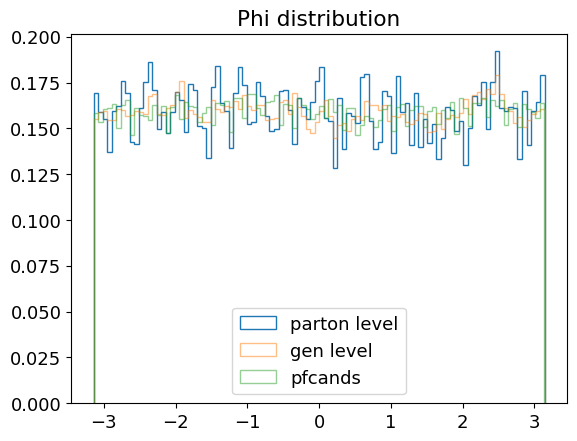

In [7]:
fig, ax = plt.subplots()
ax.hist(parton_phi, bins=100, label="parton level", histtype="step", density=True)
ax.hist(gen_phi, bins=100, alpha=0.5, label="gen level", histtype="step",  density=True)
ax.hist(pfcand_phi, bins=100, alpha=0.5, label="pfcands", histtype="step", density=True)
ax.set_title("Phi distribution")
ax.legend()
fig.show()
